<a href="https://colab.research.google.com/github/Benjamindavid03/LargeLanguageModels/blob/main/Huggingface_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Login with a HuggingFace Token

In [1]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) n
Token is valid (permission: fineGrained).
The token `llm` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `llm`


# Text Generation using transformers






In [ ]:
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load tokenizer and model
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
# Input prompt
prompt = "Dora the Explorer and her friends"

# Assign pad_token to eos_token
tokenizer.pad_token = tokenizer.eos_token

# Tokenize input and create attention mask
inputs = tokenizer(prompt, return_tensors="pt", padding=True)

# Add pad_token_id explicitly
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id

# Generate text with attention mask
output = model.generate(
    inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    max_length=100,
    num_return_sequences=1,
    do_sample=True,
    temperature=0.7,
    pad_token_id=tokenizer.pad_token_id,
)

# Decode and print the output
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

Dora the Explorer and her friends.

The Dora the Explorer's most famous appearance was as a guest on the episode "The Adventures of Zim."

She has a more traditional appearance in the third season of "The Americans."

She was seen in "The Americans" and "Arrested Development," respectively.

In "The Americans," O'Brien also shows up with the Dora the Explorer and the Tasha the Explorer in her home.




In [ ]:
# Input prompt
prompt = "Video Games"

# Assign pad_token to eos_token
tokenizer.pad_token = tokenizer.eos_token

# Tokenize input and create attention mask
inputs = tokenizer(prompt, return_tensors="pt", padding=True)

# Add pad_token_id explicitly
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id

# Generate text with attention mask
output = model.generate(
    inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    max_length=100,
    num_return_sequences=1,
    do_sample=True,
    temperature=0.7,
    pad_token_id=tokenizer.pad_token_id,
)

# Decode and print the output
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)


Video Games

Video Games

Visual Novels

Yokai no Hikari ( ボイトロック ) is a series of three stories, which consist of a series of three stories. The first story, 'Takashi no Ippo', revolves around a group of school kids who are sent in to hunt the phantom monsters of the time.

In the series, we meet the "Papa and his two friends", which is a group of people who are


# Image Generation

In [ ]:
!pip install diffusers transformers accelerate scipy

In [ ]:
from diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion import StableDiffusionPipeline
import torch


In [ ]:
# Load the pipeline for stable diffusion
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # Move to GPU for faster performance


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Define your text prompt
prompt = "A futuristic cityscape at sunset with flying cars and neon lights"

# Generate the image
image = pipe(prompt).images[0]

# Display the image
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

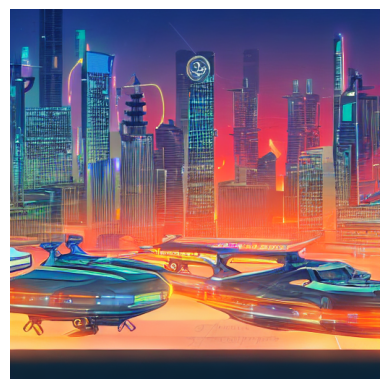

In [ ]:
# Save the image
image.save("city.png")
from PIL import Image

# Load the saved image
image_path = "city.png"  # Ensure the file path matches where the image was saved
image = Image.open(image_path)
import matplotlib.pyplot as plt

# Display the image inline
plt.imshow(image)
plt.axis("off")  # Remove axes for better visualization
plt.show()

In [ ]:
# Define your text prompt
prompt = "Monkey playing a piano"

# Generate the image
image = pipe(prompt).images[0]

# Display the image
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

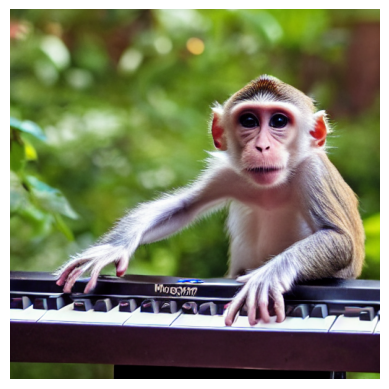

In [ ]:
# Save the image
image.save("monkey.png")
from PIL import Image

# Load the saved image
image_path = "monkey.png"  # Ensure the file path matches where the image was saved
image = Image.open(image_path)
import matplotlib.pyplot as plt

# Display the image inline
plt.imshow(image)
plt.axis("off")  # Remove axes for better visualization
plt.show()

# Text summarization

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

# Load the summarization pipeline
summarizer = pipeline('summarization', model='facebook/bart-large-cnn')

summary = summarizer("India, country that occupies the greater part of South Asia. It is made up of 28 states and eight union territories, and its national capital is New Delhi, built in the 20th century just south of the historic hub of Old Delhi to serve as India’s administrative center. Its government is a constitutional republic that represents a highly diverse population consisting of thousands of ethnic groups and hundreds of languages. India became the world’s most populous country in 2023, according to estimates by the United Nations.It is known from archaeological evidence that a highly sophisticated urbanized culture—the Indus civilization—dominated the northwestern part of the subcontinent from about 2600 to 2000 bce. From that period on, India functioned as a virtually self-contained political and cultural arena, which gave rise to a distinctive tradition that was associated primarily with Hinduism, the roots of which possibly can be traced to the Indus civilization. Other religions, notably Buddhism and Jainism, originated in India—though their presence there is now quite small—and throughout the centuries residents of the subcontinent developed a rich intellectual life in such fields as mathematics, astronomy, architecture, literature, music, and the fine arts.", max_length=50, min_length=25, do_sample=False)
print(summary[0]['summary_text'])

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


India occupies the greater part of South Asia. It is made up of 28 states and eight union territories. Its government is a constitutional republic that represents a highly diverse population.


In [ ]:
qa = pipeline('question-answering')
context = "Benjamin David is here to take session on Large Language Models and demonstrate AI models."
question = "What is Benjamin David doing here?"
answer = qa(question=question, context=context)
print(answer['answer'])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda:0


to take session on Large Language Models


# Sentiment Analysis

In [ ]:
sentiment_analyzer = pipeline('sentiment-analysis')
sentiment = sentiment_analyzer("I am  enjoyin this session!")
print(sentiment)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998708963394165}]


In [ ]:
sentiment_analyzer = pipeline('sentiment-analysis')
sentiment = sentiment_analyzer("I wish that the Trainer may get hit by a bus and I get home early") #Just joking ;-)
print(sentiment)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.9991317391395569}]


# Generate Captions for image

In [ ]:
!pip install transformers torch pillow

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch

# Load processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Open and process the image
image_path = "city.png"  # Ensure the correct path
image = Image.open(image_path).convert("RGB")  # Convert to RGB mode

# Prepare inputs
inputs = processor(images=image, return_tensors="pt")

# Generate caption
with torch.no_grad():  # Disable gradient computation for inference
    output = model.generate(**inputs)

# Decode output
caption = processor.tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated Caption:", caption)


Generated Caption: a futuristic city with futuristic cars and a futuristic car


#Transcribe audio to text

In [ ]:
from transformers import pipeline
speech_to_text = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-960h")
text = speech_to_text("path_to_your_audio.wav") # upload the file and then try to work this. Otherwise this block will not run.
print(text['text'])

In [ ]:
from transformers import pipeline
import requests

# Step 1: Download the audio file from the URL
url = "https://github.com/renandincer/libtrump/raw/refs/heads/master/you_know_were_going_to_be_suing_them_anyway.mp3"  # Replace with your audio URL
url1 = "https://www.signalogic.com/melp/EngSamples/Orig/ENG_M.wav"
response = requests.get(url1)

# Save the downloaded audio file locally
audio_path = "downloaded_audio.wav"
with open(audio_path, "wb") as audio_file:
    audio_file.write(response.content)

# Step 2: Initialize the speech-to-text pipeline
speech_to_text = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-960h")

# Step 3: Perform speech-to-text
text = speech_to_text(audio_path)

# Step 4: Print the transcribed text
print("Transcribed Text:", text['text'])

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Device set to use cuda:0


Transcribed Text: PLAN THO WELL UNDER WAY FOUR RACES TO MARS ON DE MOON IN NINETEEN NINETY TWO BY SOLA'S SALE THE RACTE MARS IS TO COMEMORATE COLUMBUS'S JOURNEY TO THE NEW WORLD FIVE HUNDRED YEARS AGO AND THE WANT OF THE MOON IS TO PROMOTE THE USE OF SOLAS SALES IN SPACE EXPLORATION


#Exploring Datasets

In [ ]:
from datasets import load_dataset
dataset = load_dataset("imdb")
print(dataset['train'][0])

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

#Text Translation

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

# Initialize the pipeline
pipe = pipeline("text2text-generation", model="suriya7/English-to-Tamil")

# English text to translate
text = "How was the Seminar today?"

# Translate to Tamil using the pipeline
translation = pipe(text)
print("Translated Text (Pipeline):", translation[0]['generated_text'])

config.json:   0%|          | 0.00/947 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.94G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/198 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/3.71M [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

Device set to use cuda:0


Translated Text (Pipeline): இன்றைய கருத்தரங்கு எப்படி இருந்தது?


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# English text to translate
text = "Contact Dr. Benjamin if you need to learn any new technology."

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("suriya7/English-to-Tamil")
model = AutoModelForSeq2SeqLM.from_pretrained("suriya7/English-to-Tamil")

# Tokenize input text
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

# Generate translation
outputs = model.generate(inputs.input_ids, max_length=50, num_beams=5, early_stopping=True)

# Decode and print the translation
translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print("Translated Text (Direct Model):", translated_text)

Translated Text (Direct Model): புதிய தொழில்நுட்பத்தை நீங்கள் கற்றுக்கொள்ள வேண்டுமானால், டாக்டர் பெஞ்சமின்-ஐ தொடர்பு கொள்ளவும்.


#Deep Seek AI


In [ ]:
import torch
from transformers import GenerationConfig
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM
model_name = "deepseek-ai/deepseek-llm-7b-base"
tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/deepseek-llm-7b-base")
model = AutoModelForCausalLM.from_pretrained("deepseek-ai/deepseek-llm-7b-base")
model.generation_config = GenerationConfig.from_pretrained(model_name)
model.generation_config.pad_token_id = model.generation_config.eos_token_id

text = "An attention function can be described as mapping a query and a set of key-value pairs to an output, where the query, keys, values, and output are all vectors. The output is"
inputs = tokenizer(text, return_tensors="pt")
outputs = model.generate(**inputs.to(model.device), max_new_tokens=100)

result = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(result)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

# References

1. https://en.wikipedia.org/wiki/Transformer_(deep_learning_architecture)
2. https://www.geeksforgeeks.org/large-language-models-llms-vs-transformers/
3. https://www.geeksforgeeks.org/getting-started-with-transformers/
4. https://medium.com/@thisislong/large-language-models-transformer-architecture-the-basics-2bdd84a6db17
5. https://github.com/dsdanielpark/hf-transllm
6. https://learn.microsoft.com/en-us/globalization/localization/ai/ai-and-llms-for-translation
7. https://cloud.google.com/speech-to-text
8. https://developer.nvidia.com/cuda-toolkit
9. https://transkriptor.com/discover
10. https://turboscribe.ai/
11. https://vizard.ai/tools/transcribe-audio-to-text
12. https://jetscribe.ai/
13. https://www.elevateai.com/
14. https://www.deepseek.com/
15. https://www.indiatoday.in/technology/news/story/deepseek-ai-what-is-it-how-it-works-is-it-better-than-chatgpt-everything-to-know-2671407-2025-01-28
16. https://www.nytimes.com/2025/01/27/technology/what-is-deepseek-china-ai.html
17. https://economictimes.indiatimes.com/tech/technology/explainer-what-is-deepseek-and-why-is-it-disrupting-the-ai-sector/articleshow/117609853.cms
18. https://www.digitaltrends.com/computing/what-is-deepseek-everything-you-need-to-know/
